In [1]:
import xarray as xr
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from pathlib import Path

In [2]:
p_gm = Path('B:\gitbmi\DelData\output')
p_gmr = Path('B:\gitbmi\DelData')
#I put the gf_v11 shapefile, only hru polys, in the following folder for processing so we'll use it for plotting
shpf_p = Path('B:\gitbmi\DelData')
# weights file used to map gridded gridmet to hrus is here
gm_wght_f = Path('B:\gitbmi\DelData') / 'Delaware_weights_hru_v1_0.csv'
print(f'the path {p_gm} exits: ', p_gm.exists())
print(f'the path {p_gmr} exits: ', p_gmr.exists())
print(f'the path {shpf_p} exits: ', shpf_p.exists())
print(f'the file {gm_wght_f} exits: ', gm_wght_f.exists())

the path B:\gitbmi\DelData\output exits:  True
the path B:\gitbmi\DelData exits:  True
the path B:\gitbmi\DelData exits:  True
the file B:\gitbmi\DelData\Delaware_weights_hru_v1_0.csv exits:  True


In [3]:
shapefiles = shpf_p.glob("*.shp")
gdf = pd.concat([
    gpd.read_file(shp)
    for shp in shapefiles
]).pipe(gpd.GeoDataFrame)
gdf.reset_index(drop=True, inplace=True)
# gdf.plot()
print(gdf)

                 LAYER region  hru_id_nat  nhm_id  model_idx  \
0    Unknown Area Type     02        5308    5308        173   
1    Unknown Area Type     02        5309    5309        175   
2    Unknown Area Type     02        5310    5310        174   
3    Unknown Area Type     02        5311    5311        176   
4    Unknown Area Type     02        5312    5312        177   
..                 ...    ...         ...     ...        ...   
760  Unknown Area Type     02        7248    7248        209   
761  Unknown Area Type     02        7249    7249        184   
762  Unknown Area Type     02        7250    7250        216   
763  Unknown Area Type     02        7251    7251        221   
764  Unknown Area Type     02        7252    7252        448   

                                              geometry  
0    MULTIPOLYGON (((-75.13599 38.75503, -75.13564 ...  
1    POLYGON ((-75.21891 38.82734, -75.21861 38.827...  
2    POLYGON ((-75.16132 38.78953, -75.16142 38.789...  
3  

In [4]:
pd_wght_f = pd.read_csv(gm_wght_f)
wghts_id = pd_wght_f.columns[1]
print(f'wght_id: {wghts_id}')
pd_wght_f.head()

wght_id: hru_id_nat


,grid_ids,hru_id_nat,w
0,353234,5308,0.056748
1,353233,5308,0.001049
2,356004,5308,0.047884
3,354618,5308,0.142716
4,356006,5308,0.240614


In [5]:
wght_sum = pd_wght_f.groupby(wghts_id).sum()
wght_sum.head()

,grid_ids,w
hru_id_nat,,
5308,3548967,1.0
5309,353233,1.0
5310,1415708,1.0
5311,7096497,1.0
5312,3525380,1.0


(0.999, 1.001)

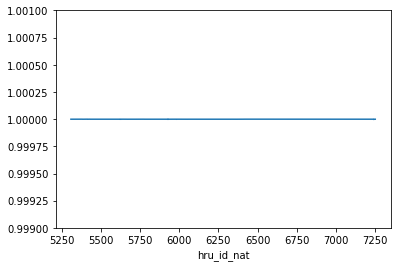

In [40]:
wght_sum.w.plot()
ax = plt.gca()
ax.ticklabel_format(useOffset=False)
ax.set_ylim(.999, 1.001)

In [7]:
ftmax = list(p_gmr.glob('tmax*.nc'))

In [8]:
dtmax = xr.open_dataset(ftmax[0])
dtmax


<xarray.Dataset>
Dimensions:                    (day: 31, lat: 585, lon: 1386)
Coordinates:
  * day                        (day) datetime64[ns] 2018-01-01 ... 2018-01-31
  * lat                        (lat) float64 49.4 49.36 49.32 ... 25.11 25.07
  * lon                        (lon) float64 -124.8 -124.7 ... -67.1 -67.06
Data variables:
    daily_maximum_temperature  (day, lat, lon) float32 ...
Attributes:
    geospatial_bounds_crs:      EPSG:4326
    Conventions:                CF-1.0
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.400000000000006
    geospatial_lon_min:         -124.76666663333334
    geospatial_lon_max:         -67.05833330000002
    geospatial_lon_resolution:  0.041666666666666
    geospatial_lat_resolution:  0.041666666666666
    geospatial_lat_units:       decimal_degrees north
    geospatial_lon_units:       decimal_degrees east
    coordinate_system:          EPSG:4326
    author:                     John Abatzoglou - University of Idaho, jabatz...
    date:                       02 March 2020
    note1:                      The projection information for this file is: ...
    note2:                      Citation: Abatzoglou, J.T., 2013, Development...
    note3:                      Data in slices after last_permanent_slice (1-...
    note4:                      Data in slices after last_provisional_slice (...
    note5:                      Days correspond approximately to calendar day...
    History:                    Translated to CF-1.0 Conventions by Netcdf-Ja...

In [9]:
ds = xr.open_dataset(p_gm / 'climate_2020_05_29.nc' )
ds

<xarray.Dataset>
Dimensions:  (hruid: 765, time: 31)
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-31
  * hruid    (hruid) int32 5308 5309 5310 5311 5312 ... 7248 7249 7250 7251 7252
Data variables:
    hru_lat  (hruid) float32 ...
    hru_lon  (hruid) float32 ...
    tmax     (time, hruid) float32 ...
    tmin     (time, hruid) float32 ...
    prcp     (time, hruid) float32 ...
    rhmax    (time, hruid) float32 ...
    rhmin    (time, hruid) float32 ...
    ws       (time, hruid) float32 ...
Attributes:
    Conventions:  CF-1.8
    featureType:  timeSeries
    history:

In [16]:
ds.hruid

<xarray.DataArray 'hruid' (hruid: 765)>
array([5308, 5309, 5310, ..., 7250, 7251, 7252])
Coordinates:
  * hruid    (hruid) int32 5308 5309 5310 5311 5312 ... 7248 7249 7250 7251 7252
Attributes:
    cf_role:    timeseries_id
    long_name:  local model hru id

In [17]:
gdf['tmax'] = 0.0
for index, row in gdf.iterrows():
    hind = row['hru_id_nat']
    value = ds.tmax.values[0,index]
    gdf.at[index,'tmax'] = value
gdf

,LAYER,region,hru_id_nat,nhm_id,model_idx,geometry,tmax
0,Unknown Area Type,02,5308,5308,173,"MULTIPOLYGON (((-75.13599 38.75503, -75.13564 ...",-4.855952
1,Unknown Area Type,02,5309,5309,175,"POLYGON ((-75.21891 38.82734, -75.21861 38.827...",-5.049988
2,Unknown Area Type,02,5310,5310,174,"POLYGON ((-75.16132 38.78953, -75.16142 38.789...",-4.968304
3,Unknown Area Type,02,5311,5311,176,"MULTIPOLYGON (((-75.25613 38.73334, -75.25579 ...",-5.256260
4,Unknown Area Type,02,5312,5312,177,"POLYGON ((-75.22050 38.83309, -75.22084 38.833...",-5.095961
...,...,...,...,...,...,...,...
760,Unknown Area Type,02,7248,7248,209,"POLYGON ((-74.59461 42.04596, -74.59432 42.045...",-11.845064
761,Unknown Area Type,02,7249,7249,184,"POLYGON ((-74.49984 42.24245, -74.49992 42.242...",-11.406086
762,Unknown Area Type,02,7250,7250,216,"POLYGON ((-74.59760 41.92733, -74.59795 41.927...",-11.512044
763,Unknown Area Type,02,7251,7251,221,"MULTIPOLYGON (((-74.76498 41.88257, -74.76534 ...",-11.640639


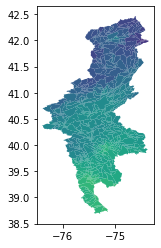

In [26]:
gdf.plot(column='tmax',vmin=-15, vmax=0)


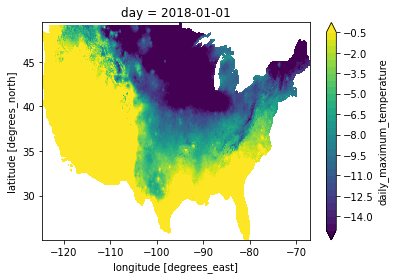

In [27]:
import datetime as dt
lvls = np.arange(-15, 0, 0.5)
date = dt.datetime(year=2018,month=1,day=1)
xrtmax = dtmax.daily_maximum_temperature.sel(day=date)-273.15
xrtmax.plot(levels=lvls, cmap='viridis')

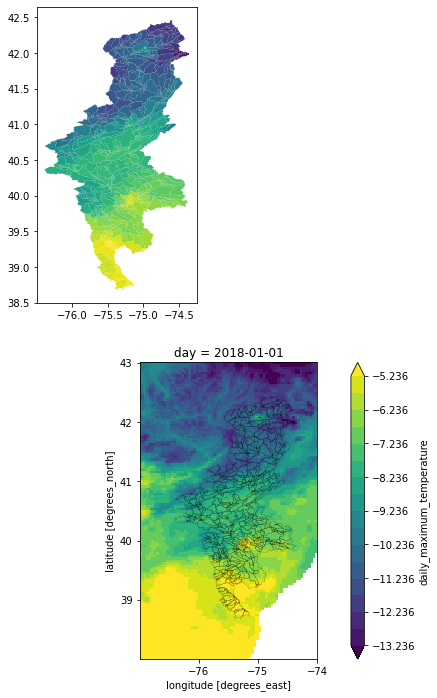

In [33]:
f, ax = plt.subplots(2, figsize=(12,12))
gdf.plot(ax=ax[0], column = 'tmax',linewidth=0., edgecolor='white')
temp = dtmax.daily_maximum_temperature[0,:,:]
# print(temp)
# print(temp.lat)
delaware = temp.where((dtmax.lon>=-77) & (dtmax.lon<=-74) & (dtmax.lat>=38) & (dtmax.lat<=43), drop=True)-273.15
# print(delaware)
lvs = np.arange(gdf['tmax'].min(), gdf['tmax'].max(), 0.5)
p=delaware.plot(ax=ax[1], levels=lvs, cmap='viridis')
gdf.geometry.boundary.plot(ax=ax[1], color=None, edgecolor='k',linewidth = 0.1)
ax[1].set_aspect('equal','box')